In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('questions.csv')

In [3]:
df.shape

(404351, 6)

In [4]:
df.sample(10)
#This is a Binary Classification Problemdf.

,id,qid1,qid2,question1,question2,is_duplicate
370471,370471,724977,724978,What were the major effects of the cambodia ea...,What were the major effects of the cambodia ea...,1
373206,373206,730222,730223,What will the world look like in the year 2100?,What will the world look like in 2100?,1
8412,8412,16802,16803,What's your experience on a full body massage ...,Which one is the best massage oil for men's body?,0
397409,397409,776523,776524,What kind of economy does the United States ha...,What kind of economy does the United States ha...,1
216214,216214,426333,426334,Is physical or mental labour more difficult?,"Which is more difficult, mental labour or phys...",0
53923,53923,107301,107302,Where do you find downloaded files on an iPhon...,How can I recover my data from a damaged iPhon...,0
20206,20206,40318,40319,How much does it cost to make an app like Beyo...,How much does it cost to make an app like Arou...,0
47188,47188,93954,93955,What are the pros and cons of FDI for India?,What are the pros and cons if India and Pakist...,0
345860,345860,677760,677761,How do I support a friend who wants to quit sm...,How do I help someone close to me quit smoking?,1
197342,197342,389481,389482,"With Google, Facebook, and the rest, why would...",Is it free to consume alcohol in the campuses ...,0


In [5]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [8]:
# Get the class distribution
print(df['is_duplicate'].value_counts())
print(df['is_duplicate'].value_counts()/df['is_duplicate'].count() * 100)

is_duplicate
0    255045
1    149306
Name: count, dtype: int64
is_duplicate
0    63.07515
1    36.92485
Name: count, dtype: float64


In [9]:
#repeated questions
newlen = pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print(np.unique(newlen).shape[0])
x = newlen.value_counts() > 1
print(x[x].shape[0])

789801
13698


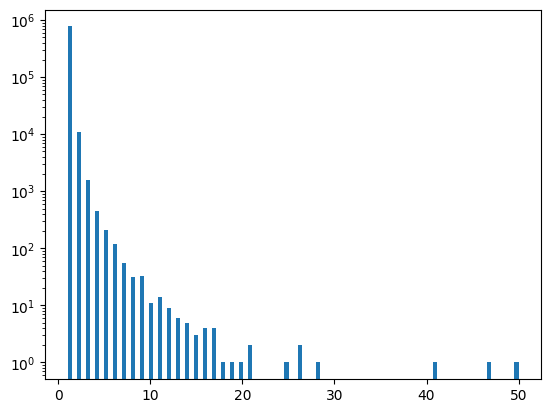

In [10]:
# we plot a histogram of the number of times each question has appeared
plt.hist(newlen.value_counts().values,bins=100)
plt.yscale('log')
plt.show()

### Only BOW

In [11]:
bow_sampledf = df.sample(50000)

In [12]:
newdf = bow_sampledf[['question1','question2']]

In [13]:
newdf

,question1,question2
167299,How do I stop caring about what people think a...,Should I care what people think about me? Most...
205109,How does one submit a question anonymously?,How do I answer questions anonymously on Quora?
181462,Why is my dog throwing up and not eating?,Why is my dog throwing up yellow bile? What sh...
274178,What is behavioral isolation?,What does it mean by isolated system?
150514,How do WordPress and Blogger compare as bloggi...,"Which is a better blogging platform, WordPress..."
...,...,...
211335,Why do people do an MBA course after engineering?,Why do people do MBA after engineering?
166882,"In prison break, why is Lincon ""Burrows"" and M...",How could Michael Scofield have survived for h...
301142,What are the lyrics of the Suits' (TV series) ...,After watching Harvey Specter in Suits which q...
307694,"What are components of Strava, Garmin Connect ...",How can I make a simple network to connect 4 c...


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

questions = list(newdf['question1'].fillna('')) + list(newdf['question2'].fillna(''))

# Call the CountVectorizer object
cv = CountVectorizer(max_features=3000)
q1, q2 = np.vsplit(cv.fit_transform(questions).toarray(), 2)


In [15]:
tdf1 = pd.DataFrame(q1, index = newdf.index)
tdf2 = pd.DataFrame(q2, index = newdf.index)

In [16]:
bowdf = pd.concat([tdf1,tdf2],axis=1)

In [17]:
bowdf.shape

(50000, 6000)

In [19]:
bowdf['is_duplicate'] = bow_sampledf['is_duplicate']

In [20]:
bowdf.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
167299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
205109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
274178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bowdf.iloc[:,0:-1].values,
                                                   bowdf.iloc[:,-1].values,test_size=0.2,random_state=None)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7493